In [1]:
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta
import time
import plotly.express as px

In [2]:
annotations = pd.read_pickle("../signal_info_val.pkl")
verbs = pd.read_csv("../data/epic-kitchens-100-annotations/EPIC_100_verb_classes.csv", index_col=0)
nouns = pd.read_csv("../data/epic-kitchens-100-annotations/EPIC_100_noun_classes.csv", index_col=0)

In [3]:
annotations.rename(columns={"power": "Power"}, inplace=True)
annotations.head()

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,mean,var,Power
narration_id,,,,,,,,,,,,,,,,,
P01_11_0,P01,P01_11,00:00:00.560,00:00:00.00,00:00:01.89,1,113,take plate,take,0,plate,2,[plate],[2],-3.932017,4.111516,19.572197
P01_11_1,P01,P01_11,00:00:01.700,00:00:01.56,00:00:02.45,93,147,put down plate,put-down,1,plate,2,[plate],[2],-1.474849,1.621919,3.797065
P01_11_10,P01,P01_11,00:00:48.500,00:00:49.15,00:00:50.95,2949,3057,take paper,take,0,paper,49,[paper],[49],0.370433,1.868327,2.005512
P01_11_100,P01,P01_11,00:05:27.840,00:05:27.28,00:05:31.97,19636,19918,wash cloth,wash,2,cloth,17,[cloth],[17],0.100239,1.828091,1.838104
P01_11_101,P01,P01_11,00:05:26.840,00:05:27.37,00:05:29.86,19642,19791,take cloth,take,0,cloth,17,[cloth],[17],0.106036,1.807867,1.819075


In [4]:
annotations["Power"].describe()

count    9668.000000
mean        3.762656
std         2.253129
min         0.567632
25%         1.993320
50%         3.319485
75%         4.932616
max        19.572197
Name: Power, dtype: float64

In [5]:
# Set up seaborn

# Configure matplotlib to use LaTeX for rendering text
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [33]:
# Plot general histplot for Power
output_dir = "../res/signals"
sns.histplot(
    data=annotations,
    bins=100,
    kde=True,
    x="Power",
    element="step",
    color="purple",
)
sns.despine()
plt.gcf().set_size_inches(6, 4)
plt.gcf().dpi = 300.0
plt.xlim(0, 15)

os.makedirs(output_dir, exist_ok=True)

# Save the plot to a PDF file
pdf_path = os.path.join(output_dir, "dist_power.pdf")
with PdfPages(pdf_path) as pdf:
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

# Plot signal stats for all verbs

In [27]:
all_verbs = annotations["verb_class"].unique()

output_dir = "../res/signals/verbs"
os.makedirs(output_dir, exist_ok=True)

for verb_class in tqdm(all_verbs):
    class_name = verbs.loc[verb_class, "key"]
    class_df = annotations.loc[annotations["verb_class"] == verb_class][
        ["narration", "verb", "verb_class", "noun", "noun_class", "all_nouns", "Power"]
    ].copy()
    corresponding_ids = class_df.index

    # Create the plot
    sns.histplot(
        data=class_df,
        x="Power",
        kde=True,
        bins=20,
        element="step",  # Using 'step' to better distinguish overlapping groups
        color="orange",
    )
    sns.despine()

    styled_verb_name = r"\texttt{" + class_name + r"}"
    plt.title(f"Signal power of verb {styled_verb_name}", fontsize=12)

    # Improve figure quality by adjusting figure size and DPI
    plt.gcf().set_size_inches(5, 4)
    plt.gcf().dpi = 300.0

    plt.xlim(0, 15)

    # Show the plot

    # Save the plot to a PDF file
    pdf_path = os.path.join(output_dir, f"{class_name}_dist.pdf")
    with PdfPages(pdf_path) as pdf:
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

100%|██████████| 78/78 [00:19<00:00,  4.09it/s]


In [28]:
all_nouns = annotations["noun_class"].unique()

output_dir = "../res/signals/nouns"
os.makedirs(output_dir, exist_ok=True)

for verb_class in tqdm(all_nouns):
    class_name = nouns.loc[verb_class, "key"]
    class_df = annotations.loc[annotations["noun_class"] == verb_class][
        ["narration", "verb", "verb_class", "noun", "noun_class", "all_nouns", "Power"]
    ].copy()
    corresponding_ids = class_df.index

    # Create the plot
    sns.histplot(
        data=class_df,
        x="Power",
        kde=True,
        bins=20,
        element="step",  # Using 'step' to better distinguish overlapping groups
    )
    sns.despine()

    styled_verb_name = r"\texttt{" + class_name + r"}"
    plt.title(f"Signal power of noun {styled_verb_name}", fontsize=12)

    # Improve figure quality by adjusting figure size and DPI
    plt.gcf().set_size_inches(5, 4)
    plt.gcf().dpi = 300.0

    plt.xlim(0, 15)

    # Show the plot

    # Save the plot to a PDF file
    pdf_path = os.path.join(output_dir, f"{class_name}_dist.pdf")
    with PdfPages(pdf_path) as pdf:
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

100%|██████████| 211/211 [00:47<00:00,  4.41it/s]


In [4]:
annotations

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,mean,var,Power
narration_id,,,,,,,,,,,,,,,,,
P01_11_0,P01,P01_11,00:00:00.560,00:00:00.00,00:00:01.89,1,113,take plate,take,0,plate,2,[plate],[2],-3.932017,4.111516,19.572197
P01_11_1,P01,P01_11,00:00:01.700,00:00:01.56,00:00:02.45,93,147,put down plate,put-down,1,plate,2,[plate],[2],-1.474849,1.621919,3.797065
P01_11_10,P01,P01_11,00:00:48.500,00:00:49.15,00:00:50.95,2949,3057,take paper,take,0,paper,49,[paper],[49],0.370433,1.868327,2.005512
P01_11_100,P01,P01_11,00:05:27.840,00:05:27.28,00:05:31.97,19636,19918,wash cloth,wash,2,cloth,17,[cloth],[17],0.100239,1.828091,1.838104
P01_11_101,P01,P01_11,00:05:26.840,00:05:27.37,00:05:29.86,19642,19791,take cloth,take,0,cloth,17,[cloth],[17],0.106036,1.807867,1.819075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P32_10_5,P32,P32_10,00:01:13.920,00:01:14.36,00:01:17.04,4461,4622,spray degreaser,spray,44,degreaser,22,[degreaser],[22],-2.929886,0.954237,9.538452
P32_10_6,P32,P32_10,00:01:17.729,00:01:18.69,00:01:33.75,4721,5625,wash cooker,wash,2,cooker,46,[cooker],[46],-2.889078,1.220236,9.566981
P32_10_7,P32,P32_10,00:01:40.790,00:01:39.52,00:01:59.64,5971,7178,rinse cooker,rinse,2,cooker,46,[cooker],[46],-2.722926,1.361316,8.775617


In [6]:
def timestamp_to_sec(timestamp):
    time_parts = timestamp.split(".")
    base_time = time_parts[0]
    microsecond_part = time_parts[1].rstrip("0") if len(time_parts) > 1 else "0"

    if not microsecond_part:
        microsecond_part = "0"

    x = time.strptime(base_time, "%H:%M:%S")

    # Calculate the divisor based on the length of the microsecond part
    divisor = 10 ** len(microsecond_part)

    sec = (
        float(
            timedelta(
                hours=x.tm_hour,
                minutes=x.tm_min,
                seconds=x.tm_sec,
                microseconds=int(microsecond_part),
            ).total_seconds()
        )
        + int(microsecond_part) / divisor
    )
    return sec

In [7]:
annotations["Duration"] = annotations["stop_timestamp"].apply(timestamp_to_sec) - annotations["start_timestamp"].apply(timestamp_to_sec)
# annotations.loc[annotations["Duration"] > 10] = 11

In [15]:
annotations

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,mean,var,Power,Duration
narration_id,,,,,,,,,,,,,,,,,,
P01_11_0,P01,P01_11,00:00:00.560,00:00:00.00,00:00:01.89,1,113,take plate,take,0,plate,2,[plate],[2],-3.932017,4.111516,19.572197,1.890089
P01_11_1,P01,P01_11,00:00:01.700,00:00:01.56,00:00:02.45,93,147,put down plate,put-down,1,plate,2,[plate],[2],-1.474849,1.621919,3.797065,0.889989
P01_11_10,P01,P01_11,00:00:48.500,00:00:49.15,00:00:50.95,2949,3057,take paper,take,0,paper,49,[paper],[49],0.370433,1.868327,2.005512,1.800080
P01_11_100,P01,P01_11,00:05:27.840,00:05:27.28,00:05:31.97,19636,19918,wash cloth,wash,2,cloth,17,[cloth],[17],0.100239,1.828091,1.838104,4.690069
P01_11_101,P01,P01_11,00:05:26.840,00:05:27.37,00:05:29.86,19642,19791,take cloth,take,0,cloth,17,[cloth],[17],0.106036,1.807867,1.819075,2.490049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P32_10_5,P32,P32_10,00:01:13.920,00:01:14.36,00:01:17.04,4461,4622,spray degreaser,spray,44,degreaser,22,[degreaser],[22],-2.929886,0.954237,9.538452,2.679968
P32_10_6,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11.000000,11.000000,11.000000,11.000000
P32_10_7,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11.000000,11.000000,11.000000,11.000000


In [31]:
# Plot the sample duration
output_dir = "../res/signals"
sns.histplot(
    data=annotations,
    bins=1000,
    kde=True,
    x="Duration",
    element="step",
    color="tomato",
)
sns.despine()

# Improve figure quality by adjusting figure size and DPI
plt.gcf().set_size_inches(6, 4)
plt.gcf().dpi = 300.0

plt.xlim(0, 30)

# Save the plot to a PDF file
pdf_path = os.path.join(output_dir, "dist_duration.pdf")
with PdfPages(pdf_path) as pdf:
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

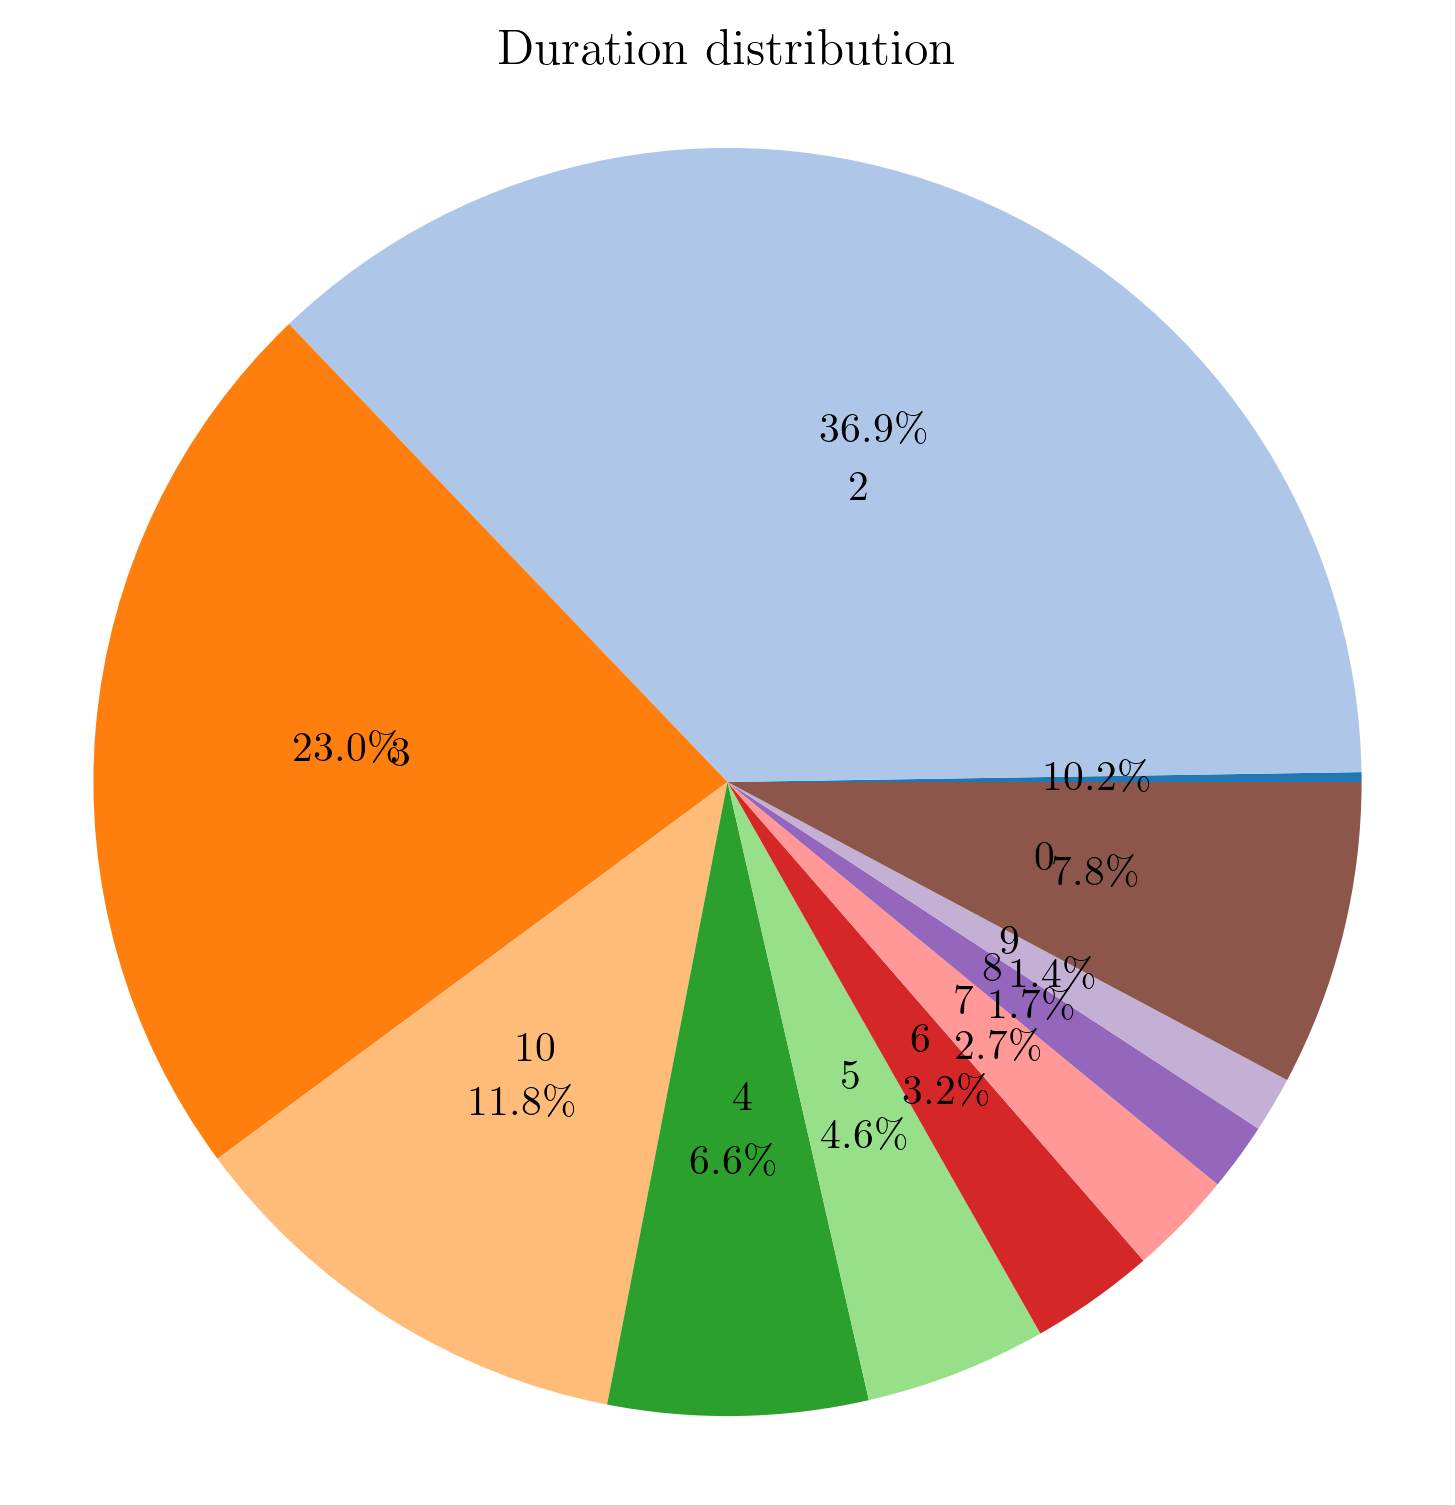

In [11]:
# Create a pie for duration after having quantized the Duration column up to 1s bins. All values > 10s are grouped together in the last bin
annotations["Duration"] = annotations["Duration"].apply(lambda x: min(x, 10))
annotations["Duration"] = annotations["Duration"].apply(lambda x: round(x))

output_dir = "../res/signals"

plt.pie(
    annotations["Duration"].value_counts().sort_index(),
    labels=annotations["Duration"].value_counts().index,
    autopct="%1.1f\%%",
    colors=sns.color_palette("tab20"),
    # Fix label position to be centered
    labeldistance=0.5,

)
plt.title("Duration distribution")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Increate figure quality by adjusting figure size and DPI
plt.gcf().set_size_inches(6, 6)
plt.gcf().dpi = 300.0
